In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [2]:
%display latex

In [3]:
Parallelism().set(nproc=8)

In [21]:
a, m=var('a m')
a0=0.998
m=1

In [22]:
from kerrgeodesic_gw import KerrBH
M=KerrBH(a, m)
print(M)

Kerr spacetime M


In [23]:
rH=M.event_horizon_radius()
rH

sqrt(-a^2 + 1) + 1

In [24]:
rH0=rH.subs({a:a0})
rH0

1.06321392251712

In [25]:
BL.<t,r,th,ph>=M.boyer_lindquist_coordinates()
BL

Chart (M, (t, r, th, ph))

In [26]:
g=M.metric()
g.display()

g = -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2) dt*dt - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt + (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph*dph

## Geodésica tipo tiempo acotada

Establecemos $\mu=1$ y escogemos algunos valores de $E$, $L$ y $Q$ con $E<1$ para asegurar que estamos lidiando con una geodésica acotada.

In [27]:
mu=1
E=0.9
L=2
Q=1.3

In [28]:
r=var('r')
R(r)=((E^2-mu^2)*r^4
      +2*m*mu*r^3
      +(a0^2*(E^2-mu^2)-Q-L^2)*r^2
      +2*m*(Q+(L-a0*E)^2)*r
      -a0^2*Q)
R(r)

-0.190000000000000*r^4 + 2*r^3 - 5.48924076000000*r^2 + 5.02792648000000*r - 1.29480520000000

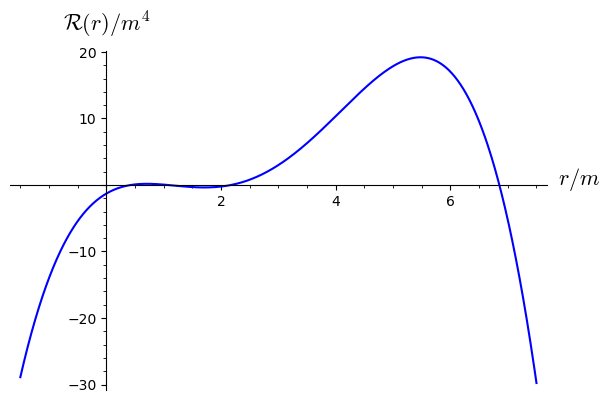

In [29]:
graph = plot(R(r), (r, -1.5, 7.5), thickness=1.5,
             axes_labels=[r'$r/m$', r'$\mathcal{R}(r)/m^4$'])
graph

In [30]:
rp = find_root(R(r), 1.5, 4)
rp

2.1752102281015393

In [31]:
ra = find_root(R(r), 5, 10)
ra

6.852695179907905

Punto inicial $P$ de la geodésica

In [55]:
P = M.point((0, (rp+ra)/2, pi/2, 0), name='P')
print(P)

Point P on the Kerr spacetime M


In [64]:
lmax=200
Li=M.geodesic([0,lmax],P,mu=mu,E=E,L=L,Q=Q,a_num=a0,
             name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 1.51876198038160 d/dt + 0.187663512911857 d/dr + 0.0559574180643787 d/dth + 0.122475774691562 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [61]:
print(Li)

Geodesic Li of the Kerr spacetime M


In [65]:
Li.integrate(step=0.005)

In [66]:
Li.plot(plot_points=2000, thickness=1.5)

Graphics3d Object

In [67]:
integrate?

In [68]:
kerrgeodesic_gw?

Object `kerrgeodesic_gw` not found.
